# Monte Carlo Simulation

#### Pre-req:

You may check the sources: <https://ocw.mit.edu/resources/res-6-012-introduction-to-probability-spring-2018/part-i-the-fundamentals/buffons-needle-monte-carlo-simulation/> or <https://en.wikipedia.org/wiki/Buffon%27s_needle_problem>


This is Monte Carlo simulation that approximates phi by computing the ratio of the area of a quarter disk (inside the unit square) to the area of the square. Start with a repetition number of N = 10000 and then additionally increase N = 20,000; 50,000; 100,000; 5 x 100,000; 1,000,000. 

For each N, we run the code three times using different seeds and compute the mean and the minimum, maximum values for each set of three results. Summarize the results in an error-bar plot of the approximation as a function of N where the error bars should extend from minimum to maximum. Also include the exact result as a horizontal line in your plot. 

Finally briefly, in the end we will compare the method with Buffon's needle method.

In [7]:
#import the function and libraries
from rng import random, putSeed,getSeed 
import math 
import pandas as pan
from statistics import mean

# Uniform function 
def Uniform(a,b):  
    return (a + (b - a) * random()) 

# Initialize N
N = [10000, 20000, 50000, 100000] #, 500000, 1000000]

def seedsfunction(Ns,Ys):
    pro = [[myfunction(N, Y) for Y in Ys] for N in Ns]
    return pro

# monte carlo 
def myfunction(N,Y):
    putSeed(Y)
    points = 0
    for j in range(0,N):
        x = Uniform(0,1)
        y = Uniform(0,1)
        if (math.sqrt(pow(x,2) + pow(y,2)) < 1.0):
            points=points+1
    quarto = (float)(points/N)
    circle = quarto*4
    print("===============================")
    print("Pi with seed = "+str(Y), (circle))
    return circle

# Result of Pi
print("========================Pi=====")
p = seedsfunction(N,[123432,234444,443434])

========================Pi=====
Pi with seed = 123432 3.122
Pi with seed = 234444 3.132
Pi with seed = 443434 3.1356
Pi with seed = 123432 3.161
Pi with seed = 234444 3.1322
Pi with seed = 443434 3.1438
Pi with seed = 123432 3.15248
Pi with seed = 234444 3.14096
Pi with seed = 443434 3.13296
Pi with seed = 123432 3.14376
Pi with seed = 234444 3.14396
Pi with seed = 443434 3.14096


In [8]:
# dataframe
df = pan.DataFrame(p)

Text(0, 0.5, 'Pi Value')

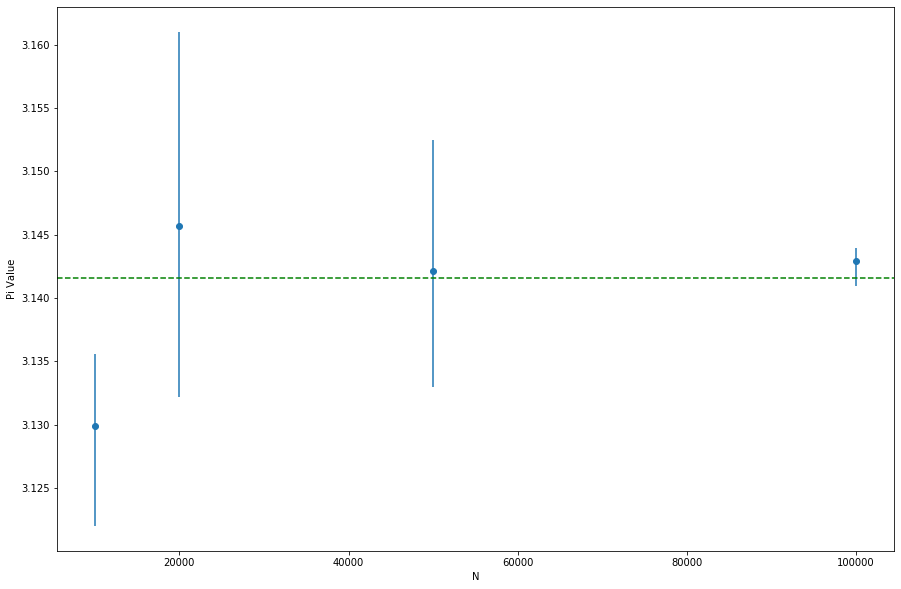

In [9]:
# import library to plot Buffon's neddle method result
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

meanfunc = df.mean(axis=1)
maxfunc = df.max(axis=1)
minfunc = df.min(axis=1)

plt.errorbar(N, meanfunc, [meanfunc - minfunc, maxfunc - meanfunc], fmt='o')
plt.axhline(y=math.pi, color='green', linestyle='dashed')
plt.xlabel("N")
plt.ylabel("Pi Value")

Text(0, 0.5, 'Pi Value')

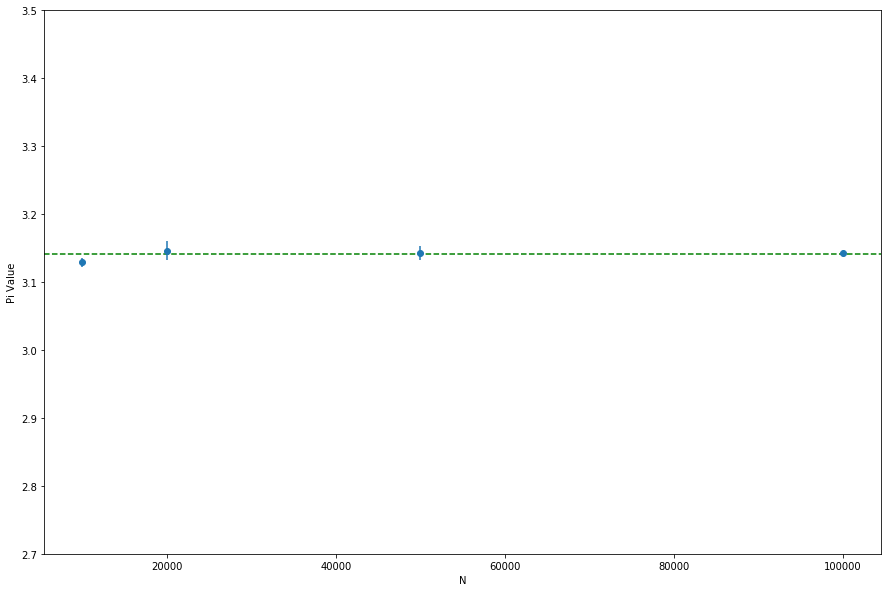

In [10]:
# Let's change the y limit with monte carlo's method as comparison with Buffon's needle simulation's result.
plt.errorbar(N, meanfunc, [meanfunc - minfunc, maxfunc - meanfunc], fmt='o')
plt.axhline(y=math.pi, color='green', linestyle='dashed')
plt.ylim(2.7,3.5)
plt.xlabel("N")
plt.ylabel("Pi Value")

Following its popularity, Monte Carlo is a more efficient method to approximate pi than Buffon's needle.

We can see right from the relative same N, the result from Monte Carlo has a lower variation rather than Buffon's. 

In fact, Buffon’s needle theorem has more parameters rather than Monte Carlo’s with a few assumptions such as the length of needle should be ~ 5/6, which does not apply with Monte Carlo’s. The right tuning of the parameters lead to a good approximation. However, that would need more time to experiment, trials, and being parsimony, we can say in this case, Monte Carlo is better than Buffon’s.

In [11]:
df # Pi estimation results

,0,1,2
0,3.12200,3.13200,3.13560
1,3.16100,3.13220,3.14380
2,3.15248,3.14096,3.13296
3,3.14376,3.14396,3.14096
